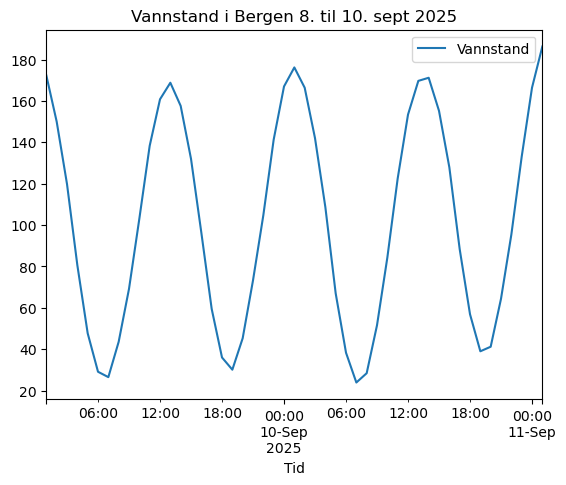

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

# Banen til datafilen Sørg for at filen er i samme mappe som scriptet
URL = 'https://raw.githubusercontent.com/LektorB/R2/refs/heads/main/vannstandsdata__60.3931_5.3327.txt'
#Last ned nyere data om du vil: https://www.kartverket.no/til-sjos/se-havniva/resultat?latitude=60.3931&longitude=5.3327

# Les dataene med Pandas
df = pd.read_csv(
    URL,
    skiprows=14,     # - `skiprows=14`: Hopper over de første 14 linjene med metadata
    sep='\s+',       # - `sep='\s+'`: Angir at kolonnene er separert med en eller flere mellomrom
    header=None,     # - `header=None`: Forteller Pandas at filen ikke har en kolonneoverskrift
    usecols=[0, 1],  # - `usecols=[0, 1, 2]`: Vi vil kun lese de tre første kolonnene (tid, observert, forventet)
    parse_dates=[0]  # - `parse_dates=[0]`: Konverterer den første kolonnen (indeks 0) til dato/tid-objekter
)

# Gi kolonnene meningsfulle navn
df.columns = ['Tid', 'Vannstand']#, 'Forventet Tidevann']

# Sett 'Tid'-kolonnen som indeksen for DataFrame, noe som er praktisk for tidsserier
df.set_index('Tid', inplace=True)

df.plot(title ='Vannstand i Bergen 8. til 10. sept 2025' )
# Høyde = df['Vannstand'].tolist()
# Timer = np.arange(1,len(Høyde)+1)
# plt.plot(Timer,Høyde,'x')
plt.show()


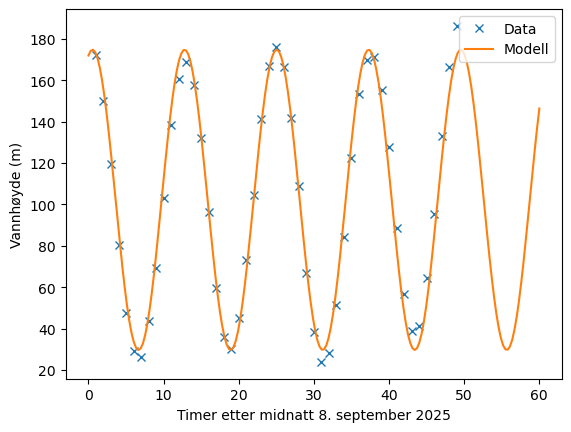

Parameterene til modellen A,c, fi og d er [ 72.57577581   0.51298575  -4.99295062 102.2487917 ]


In [16]:
Høyde = df['Vannstand'].tolist() # lager liste av data 
Timer = np.arange(1,len(Høyde)+1) # Lager liste av antall timer etter 00:00
plt.plot(Timer,Høyde,'x',label = 'Data')

def f(x,A,c,fi,d): # funksjonen vi vil modellere med
    return A*np.sin(c*x+fi)+d


popt, pcov =  opt.curve_fit(f,Timer,Høyde,p0 = [70,0.5,-5,100]) # p0 startverdier for parameterne 

#lager koordinater for å plotte modellen
xverdier = np.linspace(0,60,200)
yverdier = f(xverdier,*popt)

#plotter modellen
plt.plot(xverdier,yverdier,label = 'Modell')
plt.legend()
plt.ylabel('Vannhøyde (m)')
plt.xlabel('Timer etter midnatt 8. september 2025')
plt.show()

#skriver ut "optimale parametere" som vi fant med kurve tilpassing.
print(f'Parameterene til modellen A,c, fi og d er {popt}')

In [13]:
popt

array([ 72.57577581,   0.51298575,  -4.99295062, 102.2487917 ])